In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl # visualizations
import matplotlib.pyplot as plt

In [2]:
results=pd.read_csv('raw_data/results.csv') #import results dataset
constructor=pd.read_csv("raw_data/constructors.csv")
drivers=pd.read_csv("raw_data/drivers.csv")
pit_stops=pd.read_csv("raw_data/pit_stops.csv")


In [3]:
subset=results.query("milliseconds.str.isnumeric()==False")
list_unique=pd.unique(subset["milliseconds"])
print(list_unique)

AttributeError: Can only use .str accessor with string values!

In [5]:
list_old=['\\N']
list_new=[0]
results["milliseconds"]=results["milliseconds"].replace(list_old,list_new)
results["milliseconds_numeric"] = pd.to_numeric(results["milliseconds"])
results=results.query('milliseconds_numeric >0')
results.to_csv("raw_data/results.csv")
results.dtypes

resultId                  int64
raceId                    int64
driverId                  int64
constructorId             int64
number                   object
grid                      int64
position                 object
positionText             object
positionOrder             int64
points                  float64
laps                      int64
time                     object
milliseconds             object
fastestLap               object
rank                     object
fastestLapTime           object
fastestLapSpeed          object
statusId                  int64
milliseconds_numeric      int64
dtype: object

KeyError: 'milliseconds_numeric'

In [13]:
gb_results=(results.groupby("raceId"))
raceResults=gb_results.apply(lambda x: x.sort_values(by='milliseconds_numeric'))
display(raceResults)

resultId  raceId  driverId  constructorId number  grid position  \
raceId                                                                          
1      7553       7554       1        18             23     22     1        1   
       7554       7555       1        22             23     23     2        2   
       7555       7556       1        15              7      9    20        3   
       7556       7557       1        10              7     10    19        4   
       7557       7558       1         4              4      7    10        5   
...                ...     ...       ...            ...    ...   ...      ...   
1096   25826     25832    1096       839            214     31     8        7   
       25827     25833    1096       840            117     18    14        8   
       25828     25834    1096       817              1      3    13        9   
       25829     25835    1096        20            117      5     9       10   
       25830     25836    1096       852            213     22    11       11   

             positionText  positionOrder  points  laps         time  \
raceId                                                                
1      7553             1              1    10.0    58  1:34:15.784   
       7554             2              2     8.0    58       +0.807   
       7555             3              3     6.0    58       +1.604   
       7556             4              4     5.0    58       +4.435   
       7557             5              5     4.0    58       +4.879   
...                   ...            ...     ...   ...          ...   
1096   25826            7              7     6.0    58      +57.240   
       25827            8              8     4.0    58    +1:16.931   
       25828            9              9     2.0    58    +1:23.268   
       25829           10             10     1.0    58    +1:23.898   
       25830           11             11     0.0    58    +1:29.371   

             milliseconds fastestLap rank fastestLapTime fastestLapSpeed  \
raceId                                                                     
1      7553       5655784         17    3       1:28.020         216.891   
       7554       5656591         43   14       1:29.066         214.344   
       7555       5657388         50   10       1:28.916         214.706   
       7556       5660219         53    6       1:28.416         215.920   
       7557       5660663         53    9       1:28.712         215.199   
...                   ...        ...  ...            ...             ...   
1096   25826      5323154         45    5       1:29.333         212.817   
       25827      5342845         42    9       1:29.620         212.135   
       25828      5349182         45   18       1:30.785         209.413   
       25829      5349812         35   15       1:30.312         210.510   
       25830      5355285         40    7       1:29.489         212.446   

              statusId  milliseconds_numeric  
raceId                                        
1      7553          1               5655784  
       7554          1               5656591  
       7555          1               5657388  
       7556          1               5660219  
       7557          1               5660663  
...                ...                   ...  
1096   25826         1               5323154  
       25827         1               5342845  
       25828         1               5349182  
       25829         1               5349812  
       25830         1               5355285  

[7087 rows x 19 columns]

In [8]:
raceResults.dtypes

resultId                  int64
raceId                    int64
driverId                  int64
constructorId             int64
number                   object
grid                      int64
position                 object
positionText             object
positionOrder             int64
points                  float64
laps                      int64
time                     object
milliseconds             object
fastestLap               object
rank                     object
fastestLapTime           object
fastestLapSpeed          object
statusId                  int64
milliseconds_numeric      int64
dtype: object

In [45]:
pit_stops = pit_stops.rename(columns={'milliseconds': 'stopinmilliseconds'})
print(pit_stops.dtypes)
display(pit_stops)


drivers_merge_results=pd.merge(drivers[['driverId','driverRef','nationality']],
                              raceResults[['resultId','raceId','driverId','constructorId','number','grid','position','positionText','positionOrder','points','laps','time','milliseconds_numeric','fastestLap','rank','fastestLapTime','fastestLapSpeed','statusId']],
                          on="driverId",
                          how="right")
with_constructor_results=pd.merge(constructor[['constructorId',"name"]],
                                drivers_merge_results[['resultId','milliseconds_numeric','laps','raceId','driverId','nationality','constructorId','points']],
                           on="constructorId",
                           how="right")
with_pitstop_results=pd.merge(pit_stops[["stopinmilliseconds","stop",'driverId']],
                               drivers_merge_results[['resultId','milliseconds_numeric','laps','raceId','driverId','nationality','constructorId','points']],
                          on="driverId",
                          how="right")


raceId                 int64
driverId               int64
stop                   int64
lap                    int64
time                  object
duration              object
stopinmilliseconds     int64
dtype: object


,raceId,driverId,stop,lap,time,duration,stopinmilliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
9629,1096,849,2,38,18:02:50,25.174,25174
9630,1096,840,2,40,18:04:44,21.802,21802
9631,1096,839,2,41,18:06:09,21.734,21734
9632,1096,846,2,42,18:07:36,21.559,21559


In [46]:
gb_results=(with_constructor_results.groupby("raceId"))
raceResults=gb_results.apply(lambda x: x.sort_values(by='milliseconds_numeric').head(3))
display(raceResults)

constructorId        name  resultId  milliseconds_numeric  laps  \
raceId                                                                         
1      0                23       Brawn      7554               5655784    58   
       1                23       Brawn      7555               5656591    58   
       2                 7      Toyota      7556               5657388    58   
2      11               23       Brawn      7574               4252092    31   
       12                2  BMW Sauber      7575               4274814    31   
...                    ...         ...       ...                   ...   ...   
1095   7061            131    Mercedes     25807               5915573    71   
       7062              6     Ferrari     25808               5918095    71   
1096   7076              9    Red Bull     25826               5265914    58   
       7077              6     Ferrari     25827               5274685    58   
       7078              9    Red Bull     25828               5276007    58   

             raceId  driverId nationality  points  
raceId                                             
1      0          1        18     British    10.0  
       1          1        22   Brazilian     8.0  
       2          1        15     Italian     6.0  
2      11         2        18     British     5.0  
       12         2         2      German     4.0  
...             ...       ...         ...     ...  
1095   7061    1095         1     British    18.0  
       7062    1095       832     Spanish    15.0  
1096   7076    1096       830       Dutch    25.0  
       7077    1096       844  Monegasque    18.0  
       7078    1096       815     Mexican    15.0  

[3082 rows x 9 columns]

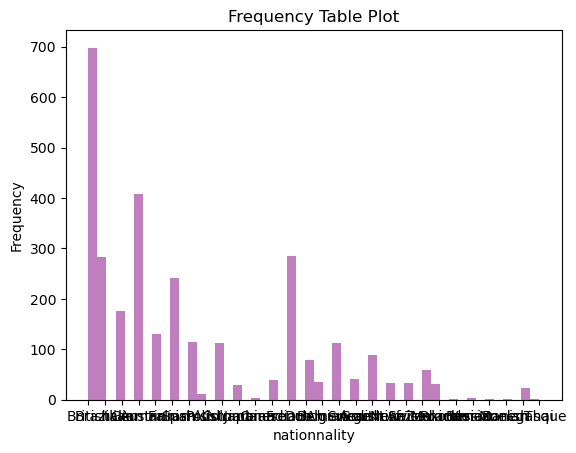

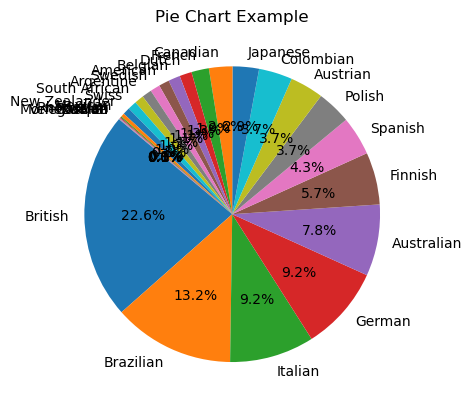

In [63]:

a=raceResults.query()
plt.pie(raceResults['nationality'].value_counts(), labels=raceResults['nationality'].unique(), autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart Example')
plt.show()